# Hand Written Digit Recognition using Decision Tree Classifier
---

In [1]:
import random
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Reading Dataset
training_images_filepath = r'dataset\train-images.idx3-ubyte'
training_labels_filepath = r'dataset\train-labels.idx1-ubyte'
testing_images_filepath = r'dataset\t10k-images.idx3-ubyte'
testing_labels_filepath = r'dataset\t10k-labels.idx1-ubyte'

# Converting to Traning & Test Data
x_train, y_train = loadlocal_mnist(training_images_filepath, training_labels_filepath)
x_test, y_test = loadlocal_mnist(testing_images_filepath, testing_labels_filepath)

# Reshaping Data for Ploting
x_train_r = x_train.reshape(60000, 28, 28)
x_test_r = x_test.reshape(10000, 28, 28)

# Dimesity of Traning & Testing Data
print('Dimension of training images:', np.shape(x_train))
print('Dimension of trainig labels:',np.shape(y_train))
print('Dimension of testing images:', np.shape(x_test))
print('Dimension of testing labels:',np.shape(y_test))
print()
print('Dimension of *training images:', np.shape(x_train_r))
print('Dimension of *testing images:', np.shape(x_test_r))

Dimension of training images: (60000, 784)
Dimension of trainig labels: (60000,)
Dimension of testing images: (10000, 784)
Dimension of testing labels: (10000,)

Dimension of *training images: (60000, 28, 28)
Dimension of *testing images: (10000, 28, 28)


In [3]:
# Creating Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [4]:
# Prediction using Decision Tree Classifier
prediction = classifier.predict(x_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
# Generating Confusion Matrix using Prediction value
c_matrix = confusion_matrix(y_test, y_pred=prediction)
c_matrix

array([[ 913,    0,    9,   12,    4,    7,   14,    5,   10,    6],
       [   1, 1081,    8,    5,    1,    8,   10,    3,   14,    4],
       [  10,   14,  880,   39,   13,    9,   11,   20,   26,   10],
       [   5,    4,   28,  862,    4,   42,    5,    8,   29,   23],
       [   6,    2,    6,    9,  864,   10,   17,   11,   20,   37],
       [  11,    6,    7,   37,    8,  747,   20,    5,   35,   16],
       [  17,    4,   11,   12,   22,   23,  841,    2,   20,    6],
       [   3,   14,   19,   14,    8,    6,    1,  932,    7,   24],
       [  12,    5,   21,   38,   19,   27,   19,   10,  790,   33],
       [  13,    5,    6,   20,   38,   13,    7,   19,   22,  866]],
      dtype=int64)

Text(69.0, 0.5, 'Actual Value')

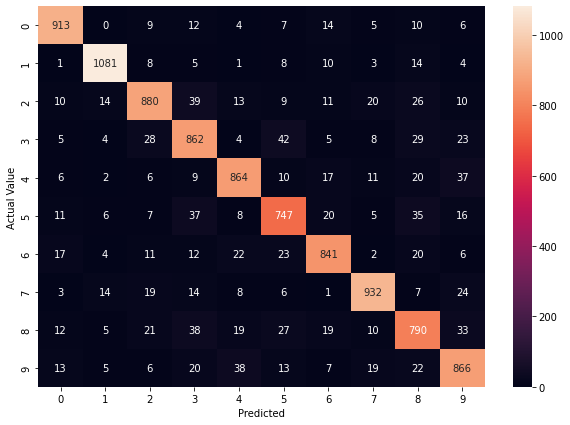

In [6]:
# Generation Heatmap of Confusion Matrix
plt.figure(figsize=(10, 7))
sn.heatmap(c_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')

In [7]:
# Accuracy of Model
print(f'Accuracy: {classifier.score(x_test, y_test)}')

Accuracy: 0.8776


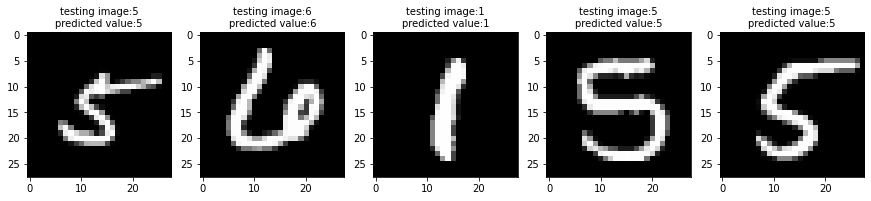

In [8]:
# Choosing 5 image to display at random
image = list()
title = list()

for i in range(5):
    r = random.randint(1, len(x_test_r))
    image.append(x_test_r[r])
    p = classifier.predict(x_test[r].reshape(1, -1))[0]
    title.append('testing image:' + str(y_test[r]) + '\npredicted value:' + str(p))

plt.figure(figsize=(15, 10))
position = 1

for x in zip(image, title):
    image = x[0]
    title = x[1]

    plt.subplot(2, 5, position)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(title, fontsize=10)

    position += 1

---